**Name: Rohan Dayal**  
**Roll No.: 19CO060**  
**DL Experiment 3**

## Problem Statement :-
Convolutional neural network (CNN): Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

## Data Collection :-

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

2023-05-11 18:42:32.450447: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 18:42:32.498664: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 18:42:32.499430: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 18:42:33.406918: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Labels-  
0	T-shirt/top  
1	Trouser  
2	Pullover  
3	Dress  
4	Coat  
5	Sandal  
6	Shirt  
7	Sneaker  
8	Bag  
9	Ankle boot

In [5]:
labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## EDA :-

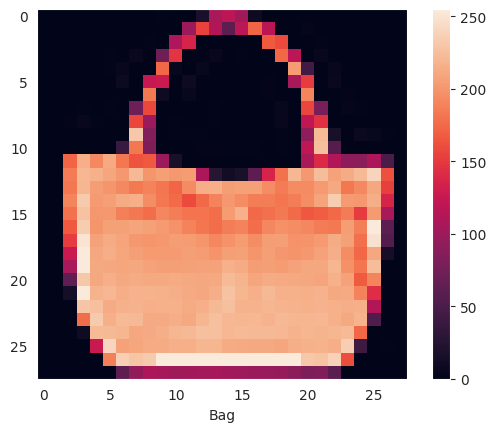

In [6]:
plt.figure()
plt.imshow(X_train[100])
plt.xlabel(labels[y_train[100]])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
X_train, X_test = X_train/255.0 , X_test/255.0

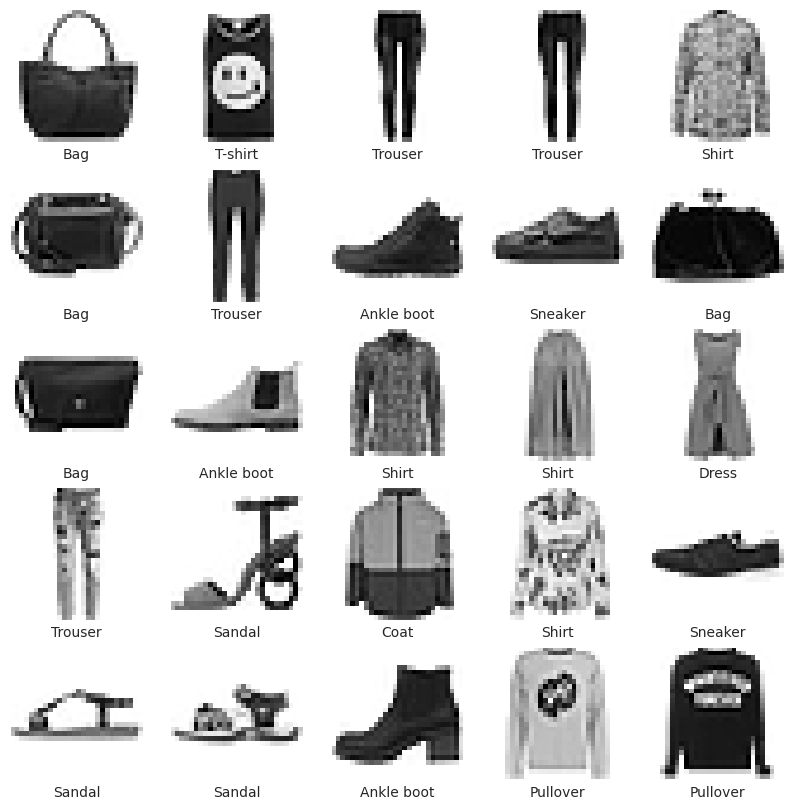

In [8]:
plt.figure(figsize=(10,10))
x=0
for i in range(100,125):
    plt.subplot(5,5,x+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
    x+=1
plt.show()

## Model Building :-

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
])

2023-05-11 18:42:36.214386: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-11 18:42:36.215230: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [12]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train,  random_state=42)

In [14]:
history = model.fit(X_train, y_train, epochs=30, batch_size=1024, validation_data=(X_val, y_val))

Epoch 1/30
47/47 [==============================] - 10s 211ms/step - loss: 0.9842 - accuracy: 0.6906 - val_loss: 0.5308 - val_accuracy: 0.8132
Epoch 2/30
47/47 [==============================] - 10s 205ms/step - loss: 0.4954 - accuracy: 0.8283 - val_loss: 0.4319 - val_accuracy: 0.8527
Epoch 3/30
47/47 [==============================] - 10s 208ms/step - loss: 0.4263 - accuracy: 0.8520 - val_loss: 0.3855 - val_accuracy: 0.8678
Epoch 4/30
47/47 [==============================] - 10s 217ms/step - loss: 0.3904 - accuracy: 0.8634 - val_loss: 0.3573 - val_accuracy: 0.8765
Epoch 5/30
47/47 [==============================] - 10s 217ms/step - loss: 0.3622 - accuracy: 0.8732 - val_loss: 0.3397 - val_accuracy: 0.8820
Epoch 6/30
47/47 [==============================] - 10s 217ms/step - loss: 0.3425 - accuracy: 0.8811 - val_loss: 0.3331 - val_accuracy: 0.8830
Epoch 7/30
47/47 [==============================] - 10s 218ms/step - loss: 0.3282 - accuracy: 0.8855 - val_loss: 0.3136 - val_accuracy: 0.8909

## Model Evaluation:-

/tmp/ipykernel_91854/3520882667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/tmp/ipykernel_91854/3520882667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

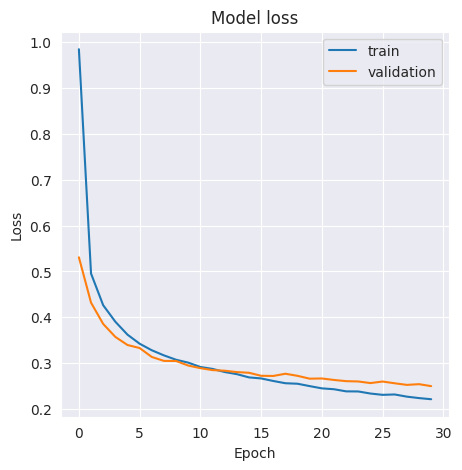

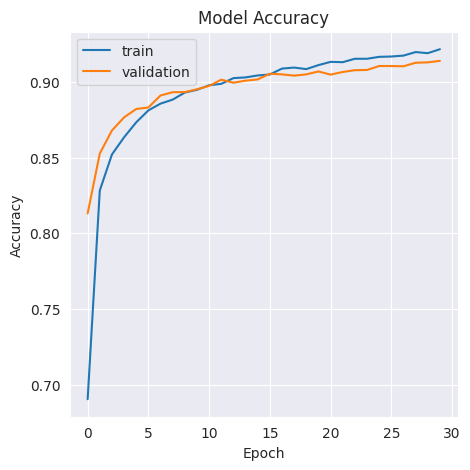

In [15]:
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(5,5)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(5,5)).set(xlabel='Epoch',ylabel='Accuracy')

In [16]:
score = model.evaluate(X_test,y_test)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2652 - accuracy: 0.9031
Test Loss : 0.2652
Test Accuracy : 0.9031


In [17]:
preds = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [18]:
preds = [np.argmax(x) for x in preds]

In [19]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.86      0.84      1000
           3       0.90      0.89      0.90      1000
           4       0.85      0.86      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.71      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [20]:
confusion_matrix(y_test, preds)

array([[846,   0,  19,  18,   5,   1, 101,   0,  10,   0],
       [  1, 978,   1,  14,   3,   0,   2,   0,   1,   0],
       [ 16,   1, 857,  10,  51,   0,  63,   0,   2,   0],
       [ 16,   7,  13, 894,  30,   0,  37,   0,   3,   0],
       [  2,   1,  67,  24, 856,   0,  50,   0,   0,   0],
       [  0,   0,   0,   1,   0, 980,   0,  10,   0,   9],
       [107,   1,  80,  27,  61,   0, 715,   0,   9,   0],
       [  0,   0,   0,   0,   0,  11,   0, 968,   1,  20],
       [  3,   2,   2,   3,   1,   2,   6,   5, 976,   0],
       [  0,   0,   0,   0,   0,   7,   1,  31,   0, 961]])